# Classification

In this guide we'll show how to compare and evaluate models with sklearn-evaluation.
We will use the penguins dataset and will try to classify based on parameters such as bill and flipper size, and which penguin species is it.

The steps in this guide are:
1. Loading the dataset
2. Data cleaning
3. Fitting models
4. Evaluating the features and models
5. Comparing the different models

In steps 4 & 5 the real value of sklearn-evaluation comes to fruition as we get a lot of visualizations out of the box which will help us compare and evaluate the models, making it easier to pick the optimal one.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn_evaluation import plot, table

# Based on
# https://github.com/Adeyinka-hub/Machine-Learning-2/blob/master/Penguin%20Dataset.ipynb

## Load the dataset

In [2]:
df = sns.load_dataset("penguins")

# Review a sample of the data
df.head(5)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

## Data cleaning

In this section, we're cleaning and preparing the dataset for fitting.
It's all in a single cell since this isn't too relevant to the tool itself.

In [3]:
df.isnull().sum()
df.dropna(inplace=True)
Y = df.species
Y = Y.map({"Adelie": 0, "Chinstrap": 1, "Gentoo": 2})
df.drop("species", inplace=True, axis=1)
se = pd.get_dummies(df["sex"], drop_first=True)
df = pd.concat([df, se], axis=1)
df.drop("sex", axis=1, inplace=True)
le = LabelEncoder()
df["island"] = le.fit_transform(df["island"])

# Decision Tree Classifier

In [4]:
X = df
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=40
)


dtc = tree.DecisionTreeClassifier()
dt_model = dtc.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Acc on test data: {:,.3f}".format(dtc.score(X_test, y_test)))

Acc on test data: 1.000


In [5]:
y_test
{"Adelie": 0, "Chinstrap": 1, "Gentoo": 2}

{'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}

## Evaluate our model

In this section, we can easily evaluate our model via a confusion matrix, and understand which feature affects our accuracy by order of importance.

<Axes: title={'center': 'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

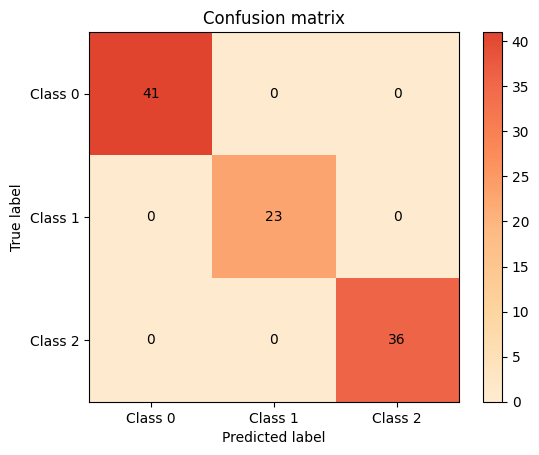

In [6]:
plot.confusion_matrix(y_test, y_pred_dt)

<Axes: title={'center': 'Feature importances'}>

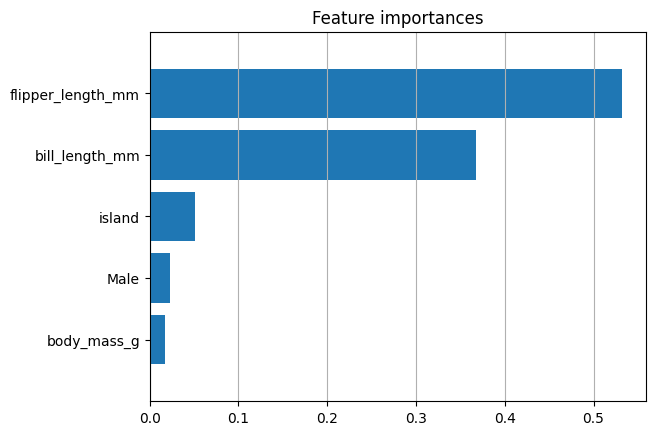

In [7]:
plot.feature_importances(dtc, top_n=5, feature_names=list(dtc.feature_names_in_))

In addition to the plot, we can also represent the importance through a table, which we can later track and query via SQL. For more information, check our [tracking guide](https://sklearn-evaluation.ploomber.io/en/latest/api/SQLiteTracker.html)

In [8]:
print(table.feature_importances(dtc, feature_names=list(dtc.feature_names_in_)))

+-------------------+--------------+
| feature_name      |   importance |
+===================+==============+
| flipper_length_mm |   0.532197   |
+-------------------+--------------+
| bill_length_mm    |   0.367249   |
+-------------------+--------------+
| island            |   0.0513876  |
+-------------------+--------------+
| Male              |   0.0232564  |
+-------------------+--------------+
| body_mass_g       |   0.0175715  |
+-------------------+--------------+
| bill_depth_mm     |   0.00833904 |
+-------------------+--------------+


# KNN classifier

0.78
              precision    recall  f1-score   support

           0       0.68      0.95      0.80        41
           1       0.91      0.43      0.59        23
           2       0.91      0.81      0.85        36

    accuracy                           0.78       100
   macro avg       0.83      0.73      0.75       100
weighted avg       0.82      0.78      0.77       100



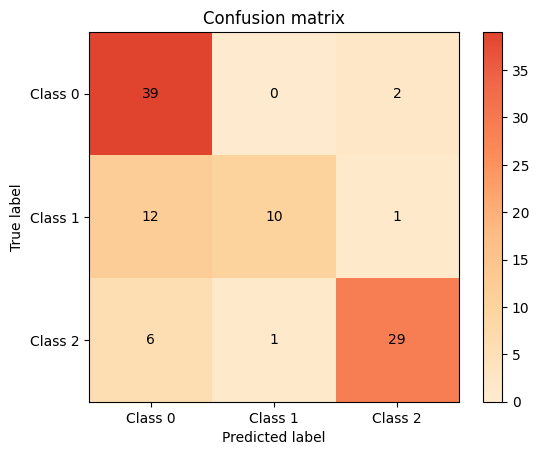

In [9]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
y_pred_knn = KNN.predict(X_test)
print(accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
knn_cm = plot.confusion_matrix(y_test, y_pred_knn)

# Comparing KNN and Random Forest reports

In this section, we will overlay both of the models via the confusion matrices. We will do the same with the classification report. This will allow us to pick the superior model without a lot of effort.

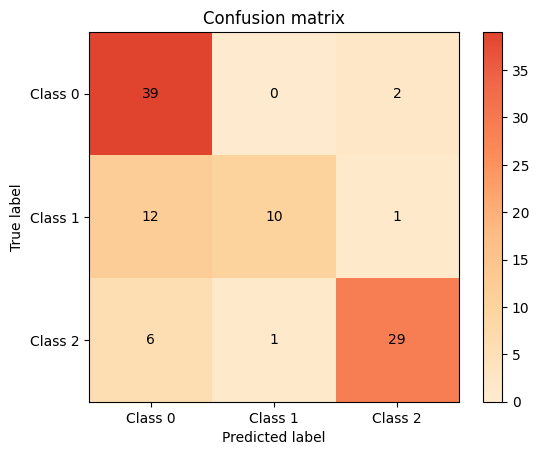

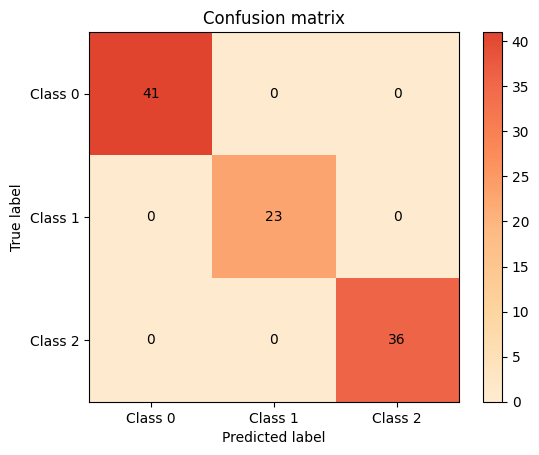

In [10]:
knn_cm = plot.ConfusionMatrix.from_raw_data(y_test, y_pred_knn)
dt_cm = plot.ConfusionMatrix.from_raw_data(y_test, y_pred_dt)

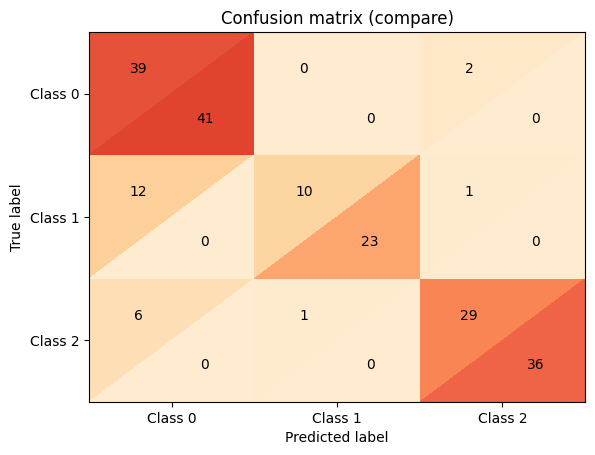

In [11]:
knn_cm + dt_cm

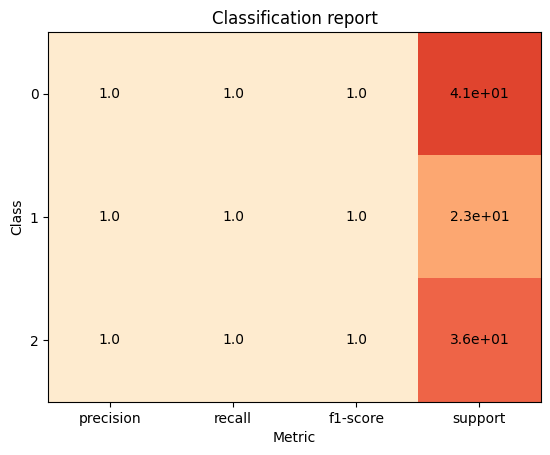

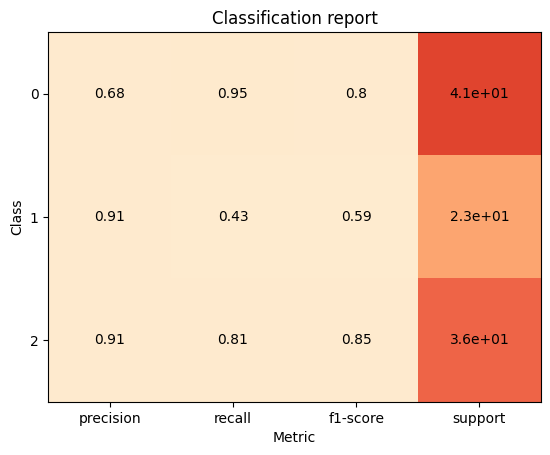

In [12]:
dt_cr = plot.ClassificationReport.from_raw_data(y_test, y_pred_dt)
knn_cr = plot.ClassificationReport.from_raw_data(y_test, y_pred_knn)

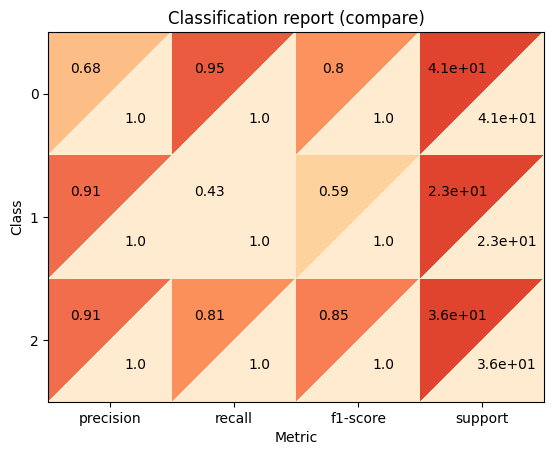

In [13]:
knn_cr + dt_cr